In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

Use <code>train_test_split</code> to split training set further into training, test or validation set

In [2]:
x_train=pd.read_csv('./IsingData/Ising40x40/xtrain.txt',sep='\s+',header=None,
                      skiprows=0,chunksize=2000,dtype=np.int32)
x_train=np.array(x_train.get_chunk(2000))
x_test=pd.read_csv('./IsingData/Ising40x40/xtest.txt',sep='\s+',header=None,
                   skiprows=0,chunksize=2000,dtype=np.int32)
x_test=np.array(x_test.get_chunk(2000))                   

In [3]:
y_train=np.loadtxt('./IsingData/Ising40x40/ytrain.txt')
y_test=np.loadtxt('./IsingData/Ising40x40/ytest.txt')

y_train=y_train[:2000]
y_test=y_test[:2000]

In [4]:
x_train.shape

(2000, 1600)

In [5]:
x_train[1]

array([ 1, -1, -1, ...,  1, -1, -1], dtype=int32)

In [6]:
y_train[:100]

array([1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0.])

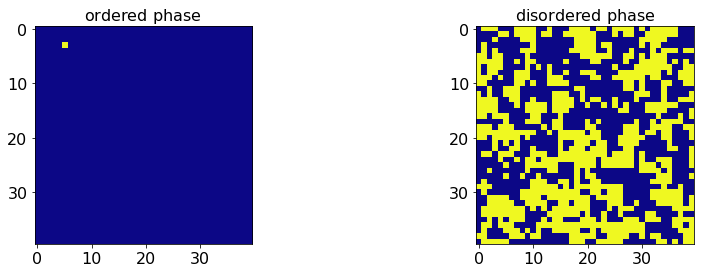

In [7]:
# plot Ising states
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# set colorbar map
cmap_args=dict(cmap='plasma_r')

L=40

fig,axarr=plt.subplots(nrows=1,ncols=2)
axarr[0].imshow(x_train[2].reshape(L,L),**cmap_args)
axarr[0].set_title('$\\mathrm{ordered\\ phase}$',fontsize=16)
axarr[0].tick_params(labelsize=16)

axarr[1].imshow(x_train[1].reshape(L,L),**cmap_args)
axarr[1].set_title('$\\mathrm{disordered\\ phase}$',fontsize=16)
axarr[1].tick_params(labelsize=16)

fig.subplots_adjust(right=2.0)
plt.show()

In [8]:
xtrain=x_train.reshape(x_train.shape[1],x_train.shape[0])
ytrain=np.reshape(y_train,(1,y_train.shape[0]))
xtest=x_test.reshape(x_test.shape[1],x_test.shape[0])
ytest=np.reshape(y_test,(1,y_test.shape[0]))

print("xtrain shape is:"+str(xtrain.shape))
print("ytrain shape is:"+str(ytrain.shape))
print("xtest shape is:"+str(xtest.shape))
print("ytest shape is:"+str(ytest.shape))

xtrain shape is:(1600, 2000)
ytrain shape is:(1, 2000)
xtest shape is:(1600, 2000)
ytest shape is:(1, 2000)


## sigmoid function 

the variable z can be a scalar of an array (vector, matrix), the returned $s=\sigma(z)$ will have the data format of input z

$\sigma(z)=\sigma \begin{bmatrix}
       z_1    \\[0.3em]
       z_2    \\[0.3em]
       \dots  \\[0.3em]
       z_n
     \end{bmatrix}=\begin{bmatrix}
       \frac{1}{1+e^{-z_1}}    \\[0.3em]
       \frac{1}{1+e^{-z_2}}     \\[0.3em]
       \dots  \\[0.3em]
       \frac{1}{1+e^{-z_n}} 
     \end{bmatrix}$



In [9]:
def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s

In [10]:
def initializeWithRandn(dim):
    w=np.zeros((dim,1))
    b=0
    
    assert(w.shape==(dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

activations:

$A=\sigma(W^TX+b)$

cost function:

$J = -\frac{1}{m}\sum_{i=1}^my^{(i)}\log a^{(i)}+(1-y^{(i)})\log(1-a^{(i)}$

gradient to weight:

$\mathrm{d}w:=\frac{\partial J}{\partial W}=\frac{1}{m}X(A-Y)^T$

gradient to bias:

$\mathrm{d}b:=\frac{\partial J}{\partial b}=\frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)})=\frac{1}{m}\mathrm{np.sum}(A-Y)$

In [11]:
def propagate(w,b,X,Y):
    m=X.shape[1]
    
    # forward propagation (X to cost)
    A = sigmoid(np.dot(w.T,X)+b)
    cost=-(np.dot(Y,np.log(A.T))+np.dot(np.log(1-A),(1-Y).T))/m
    
    # backward propagation 
    dw=np.dot(X,(A-Y).T)/m
    db=np.sum(A-Y)/m
    
    assert(dw.shape==w.shape)
    assert(db.dtype==float)
    cost=np.squeeze(cost)
    assert(cost.shape==())
    
    grads={"dw": dw,
           "db": db}
    
    return grads,cost

In [18]:
# Gradient descent
def optimize(w,b,X,Y,num_iterations,learning_rate,print_cost=False):
    costs=[]
    for i in range(num_iterations):
        grads,cost=propagate(w,b,X,Y) # compute cost, grads
        dw=grads["dw"]
        db=grads["db"]
        
        # update
        w=w-learning_rate*dw
        b=b-learning_rate*db
        
        # record the costs
        if i%100==0:
            costs.append(cost)
        # print the cost every 100 training examples
        if print_cost and i%100==0:
            print("Cost after iteration %i: %f" %(i,cost))
            
    params={"w":w,
            "b":b}
    grads={"dw":dw,
           "db":db}
        
    return params,grads,costs

In [19]:
def predict(w,b,X):
    m=X.shape[1]
    Y_prediction=np.zeros((1,m))
    w=w.reshape(X.shape[0],1)
    A=sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        # convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0,i]<=0.5:
            Y_prediction[0,i]=0
        else:
            Y_prediction[0,i]=1
    
    assert(Y_prediction.shape==(1,m))
    
    return Y_prediction

We can now use the defined modules to build a logistic regression model

In [20]:
# integrate the defined modules into model
def model(X_train,Y_train,X_test,Y_test,num_iterations=2000,learning_rate=0.5,print_cost=False):
    # initialize parameters
    w,b=initializeWithRandn(X_train.shape[0])
    # gradient descent
    parameters,grads,costs=optimize(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost)
    # retrieve parameters w and b from dictionary "parameters"
    w=parameters["w"]
    b=parameters["b"]
    # predict test/train set examples
    Y_prediction_test=predict(w,b,X_test)
    Y_prediction_train=predict(w,b,X_train)
    # print train/test errors
    print("train accuracy: {} %".format(100-np.mean(np.abs(Y_prediction_train-Y_train))*100))
    print("test accuracy: {} %".format(100-np.mean(np.abs(Y_prediction_test-Y_test))*100))
    
    d={"costs":costs,
       "Y_prediction_test":Y_prediction_test,
       "Y_prediction_train":Y_prediction_train,
       "w":w,
       "b":b,
       "learning_rate":learning_rate,
       "num_iterations":num_iterations}
    
    return d
    

Let us train the model with 2000 epoches and learning rate 0.01

In [21]:
d=model(xtrain,ytrain,xtest,ytest,num_iterations=2000,learning_rate=0.01,print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.621908
Cost after iteration 200: 0.580853
Cost after iteration 300: 0.552773
Cost after iteration 400: 0.531650
Cost after iteration 500: 0.514808
Cost after iteration 600: 0.500852
Cost after iteration 700: 0.488966
Cost after iteration 800: 0.478637
Cost after iteration 900: 0.469515
Cost after iteration 1000: 0.461359
Cost after iteration 1100: 0.453988
Cost after iteration 1200: 0.447271
Cost after iteration 1300: 0.441102
Cost after iteration 1400: 0.435403
Cost after iteration 1500: 0.430107
Cost after iteration 1600: 0.425163
Cost after iteration 1700: 0.420527
Cost after iteration 1800: 0.416164
Cost after iteration 1900: 0.412044
train accuracy: 83.95 %
test accuracy: 48.25000000000001 %


Actually 84% accuracy on our train set is not bad, since we build up our logistic regression from scratch. With tensorflow, and keras one can obtain a better optimization.

Let us now try to use tensorflow and keras to improve our accuracy

In [22]:
from sklearn import linear_model

In [23]:
logreg=linear_model.LogisticRegression(C=1.0/0.1,
                                      random_state=1,
                                      verbose=0,
                                      max_iter=1E3,
                                      tol=1E-5,
                                      solver='sag')

In [24]:
logreg.fit(x_train,y_train)

/home/phil-configs/Personal/pham/MyEnv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=10.0, max_iter=1000.0, random_state=1, solver='sag',
                   tol=1e-05)

In [25]:
logreg.score(x_test,y_test)

0.6825

In [27]:
logreg.score(x_train,y_train)

1.0

In [28]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

In [30]:
model=Sequential()
model.add(Dense(1,activation='sigmoid',input_shape=(1600,)))
model.compile(optimizer=SGD(lr=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=64)

Epoch 1/50
32/32 [==============================] - 4s 62ms/step - loss: 0.8668 - accuracy: 0.4903 - val_loss: 0.8354 - val_accuracy: 0.5135
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8712 - accuracy: 0.5088 - val_loss: 0.8633 - val_accuracy: 0.5075
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7607 - accuracy: 0.5690 - val_loss: 0.7900 - val_accuracy: 0.5100
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7880 - accuracy: 0.5438 - val_loss: 0.8460 - val_accuracy: 0.5055
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7031 - accuracy: 0.5893 - val_loss: 1.0715 - val_accuracy: 0.4955
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.6047 - val_loss: 0.9701 - val_accuracy: 0.4925
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.6256 - val_loss: 0.7790 - val_accuracy: 0.4950
Epoch 8/50
32/32 [=

Indeed, with keras we obtain a better accuracy for our classification task.